# <center> 2.1 EDA con Pandas y Matplotlib

In [1]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Dataset

In [2]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
#!wget -P ./../data/ https://raw.githubusercontent.com/CenticMurcia/curso-ciencia-datos/master/data/telecom_churn.csv

In [3]:
df = pd.read_csv('../data/telecom_churn.csv')
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

# <center> Visualización con Pandas
Pandas teine su propio [módulo para visualización](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## Análisis de varaibles categóricas:
`variableCat.value_counts().plot.bar()`

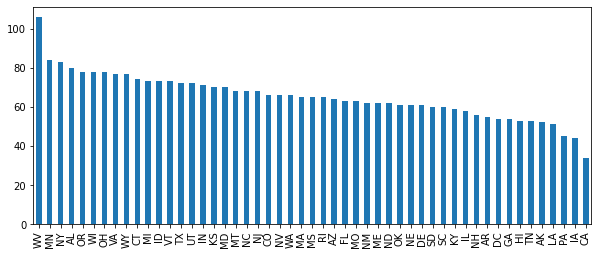

In [20]:
df["State"].value_counts().plot.bar(figsize=(10, 4));

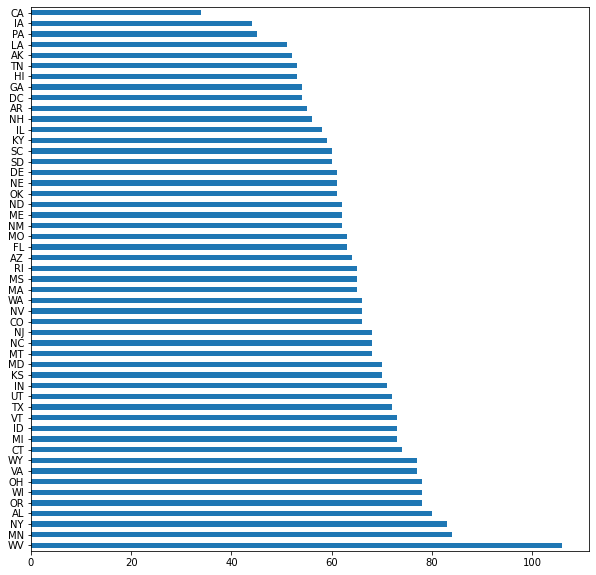

In [15]:
df["State"].value_counts().plot.barh(figsize=(10, 10));

# Análisis de varaibles numéricas

### Histogramas para ver distribuciones `variable.hist()`

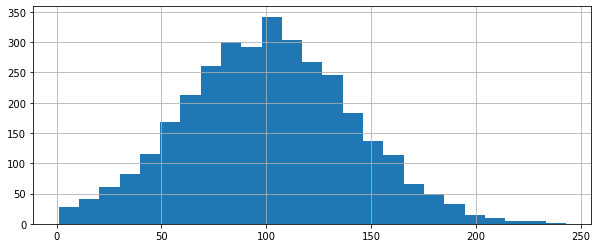

In [4]:
df["Account length"].hist(bins=25, figsize=(10, 4));

# <center> Análisis bivariante

## Variables: Numérica + Categórica

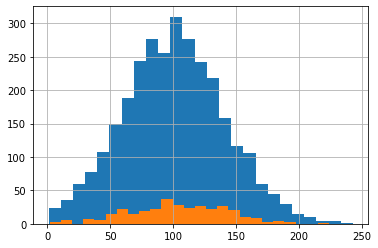

In [28]:
df.groupby('International plan')['Account length'].hist(bins=25);

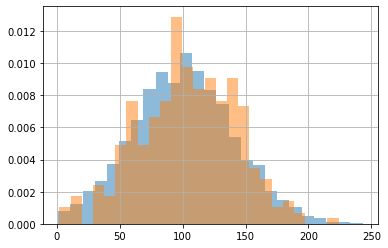

In [33]:
df.groupby('International plan')['Account length'].hist(bins=25, alpha=0.5, density=True);

Significado de media, desviación estándar y cuartiles: [link 1](https://mathbitsnotebook.com/Algebra2/Statistics/STstandardNormalDistribution.html), [link 2](https://www.cdc.gov/csels/dsepd/ss1978/lesson2/section7.html)

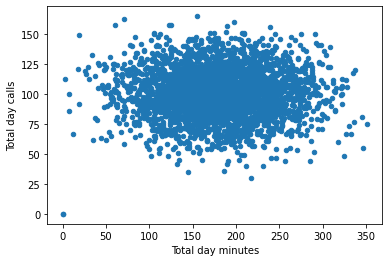

In [8]:
df.plot.scatter(x='Total day minutes', y='Total day calls');

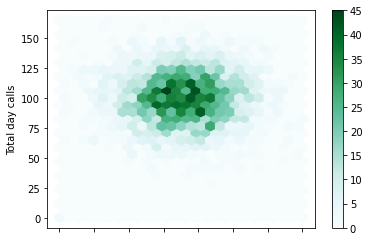

In [7]:
df.plot.hexbin(x='Total day minutes', y='Total day calls', gridsize=25);

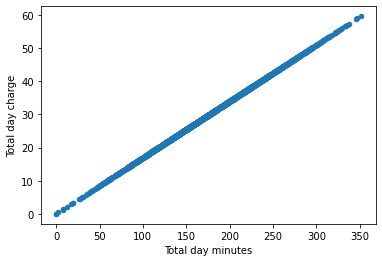

In [9]:
df.plot.scatter(x='Total day minutes', y='Total day charge');

## 2. Univariate visualization
## 2.1 Quantitative features
## Histograms and density plots

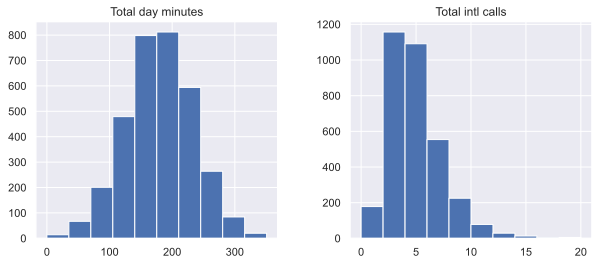

In [8]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10, 4));

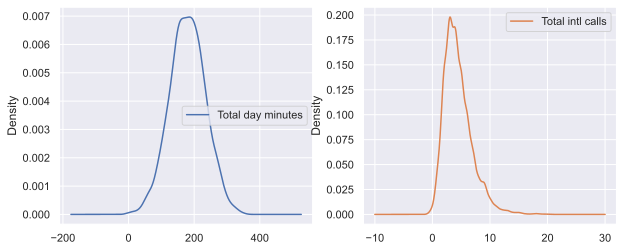

In [9]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

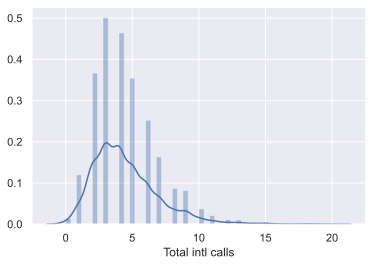

In [10]:
sns.distplot(df['Total intl calls']);

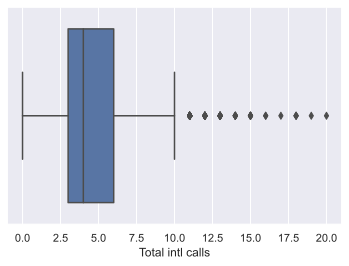

In [11]:
sns.boxplot(x='Total intl calls', data=df);

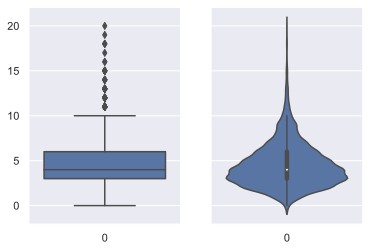

In [12]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

## 2.2 Categorical and binary features
## Frequency table


In [13]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [14]:
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

## Bar plot

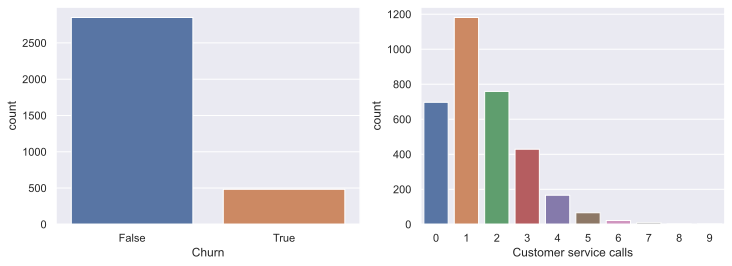

In [15]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0]);
sns.countplot(x='Customer service calls', data=df, ax=axes[1]);

## 3. Multivariate visualization

## 3.1 Quantitative vs. Quantitative

## Correlation matrix

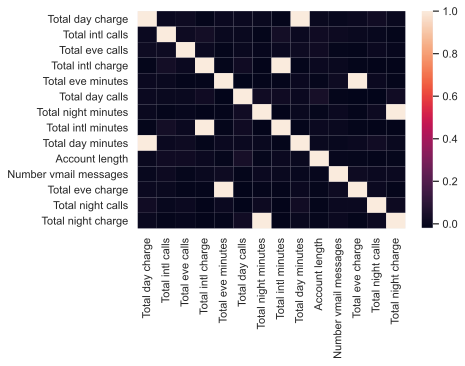

In [16]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [17]:
numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

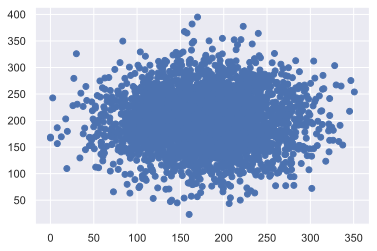

In [18]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);

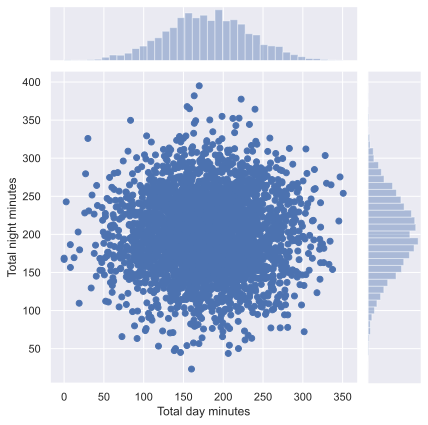

In [19]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');

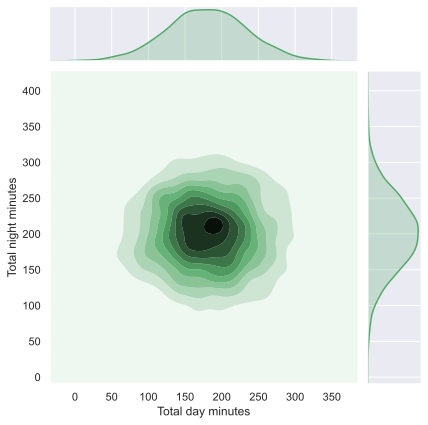

In [20]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="g");

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

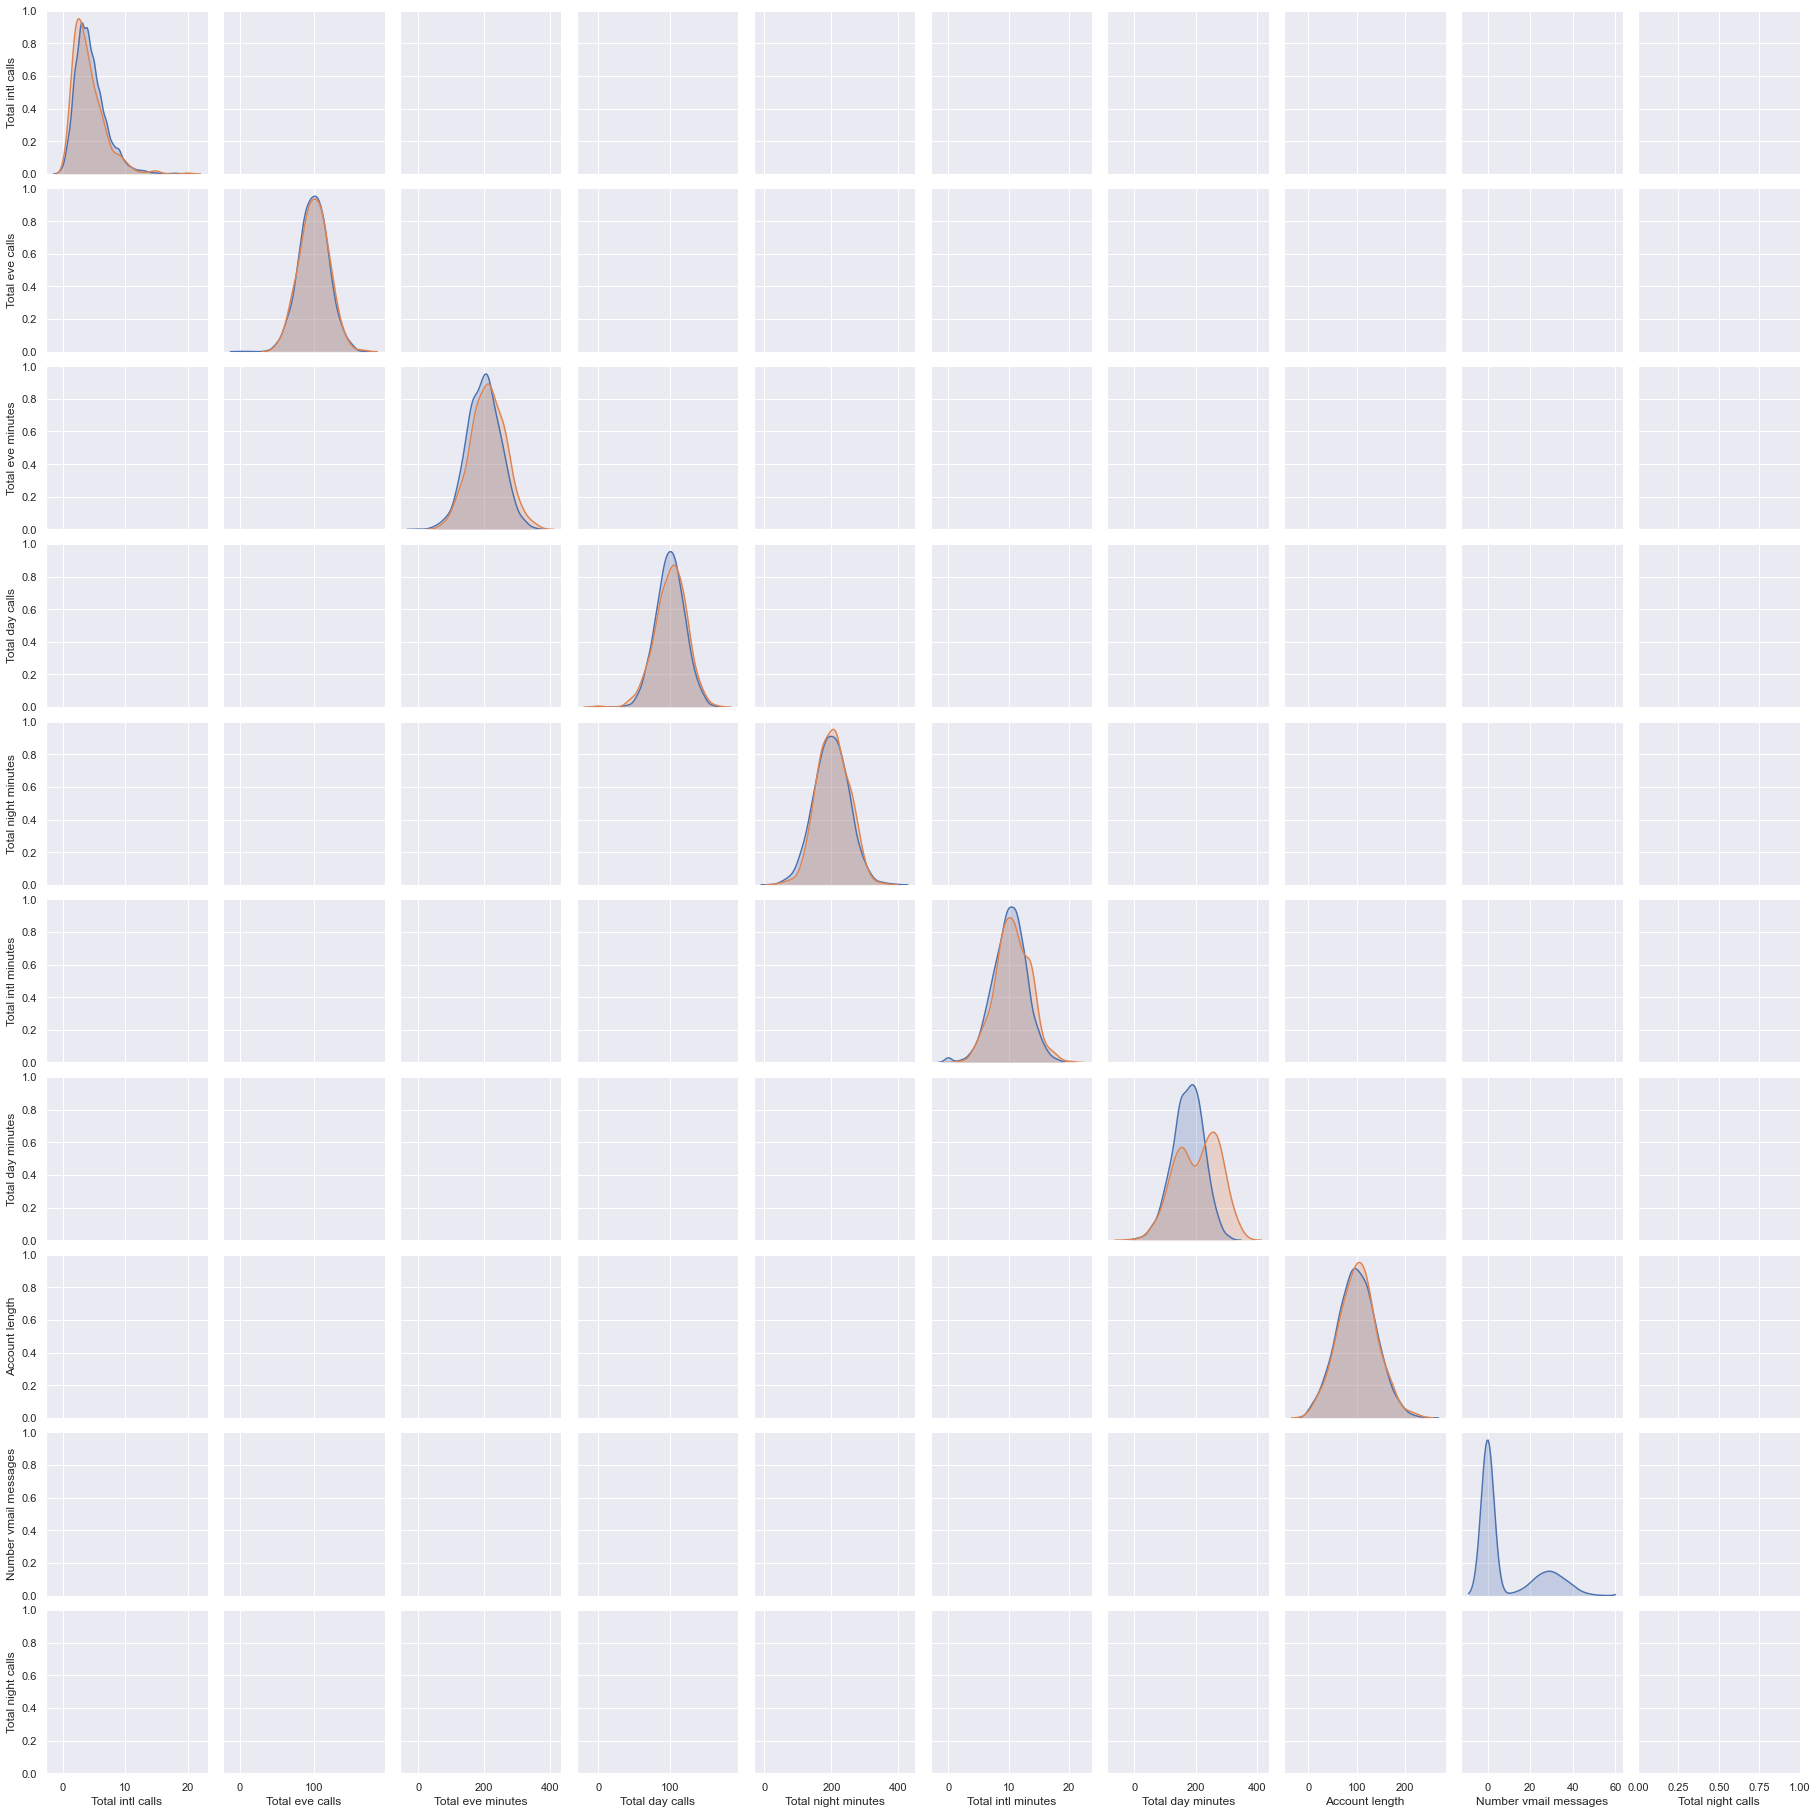

In [21]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical + ['Churn']], vars = numerical, hue='Churn');

In [ ]:
%config InlineBackend.figure_format = 'svg'

## 3.2 Quantitative vs. Categorical

In [ ]:
sns.violinplot(x="Churn", y="Total intl calls", data=df);

In [ ]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False);

In [ ]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

In [ ]:
var_quant = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=[10, 20])
plt.subplots_adjust(wspace=0.4)
for i in range(1, len(var_quant)+1):
    plt.subplot(5, 3, i)
    sns.violinplot(x="Churn", y=var_quant[i-1], data=df);

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Number vmail messages', 
            data=df[df['Number vmail messages'] > 0], 
            ax=axes[0]);

sns.violinplot(x='Churn', y='Number vmail messages', 
               data=df[df['Number vmail messages'] > 0], 
               ax=axes[1]);

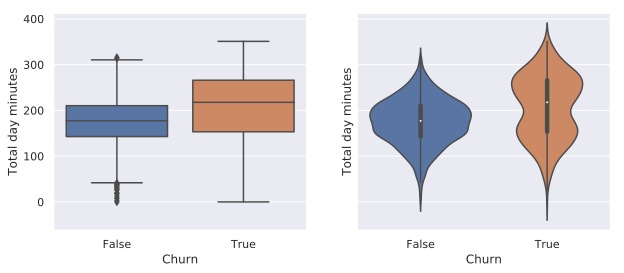

In [29]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

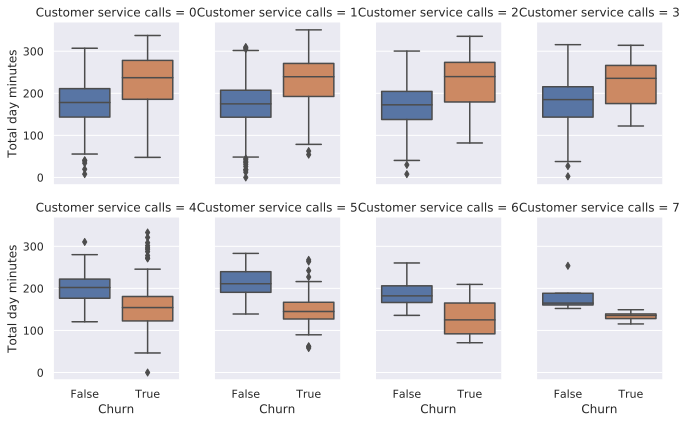

In [30]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=df[df['Customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

## 3.3 Categorical vs. Categorical

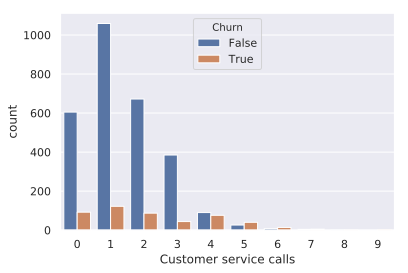

In [31]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

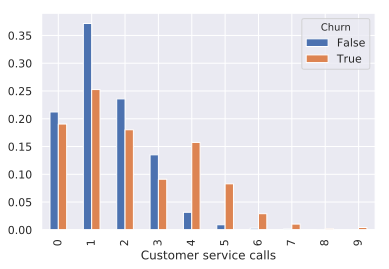

In [32]:
g = df.groupby('Churn')['Customer service calls'].value_counts(normalize=True).unstack().transpose().plot.bar()

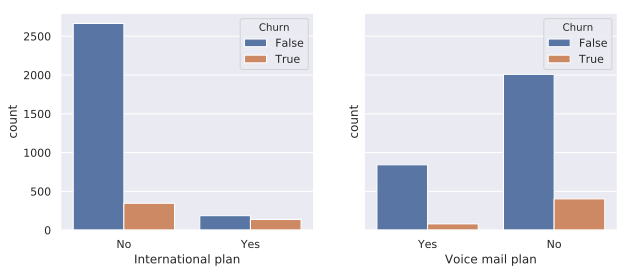

In [33]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

In [34]:
pd.crosstab(df['State'], df['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

In [35]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

## 4. Whole dataset visualizations
## 4.1 Dimensionality reduction example


https://plot.ly/python/3d-scatter-plots/

## 4.2 Dimensionality reduction: PCA

In [36]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = df.loc[:, numerical].values

# Separating out the target
y = df.loc[:,['Churn']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['Principal component 1', 'Principal component 2'])

finalDf = pd.concat([principalDf, df[['Churn']]], axis = 1)

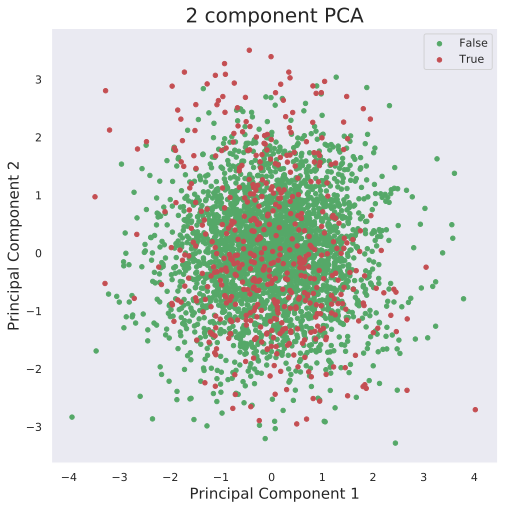

In [38]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [False, True]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Churn'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal component 1']
               , finalDf.loc[indicesToKeep, 'Principal component 2']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

## 4.3 t-SNE

In [39]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [40]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 24.6 s, sys: 12.4 ms, total: 24.6 s
Wall time: 24.6 s


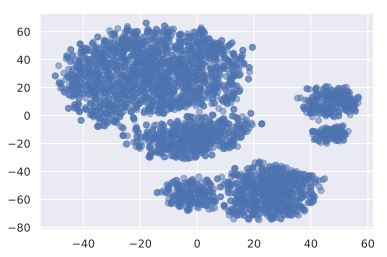

In [43]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

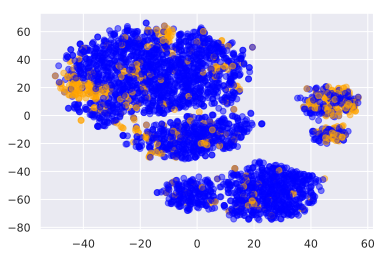

In [44]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5);

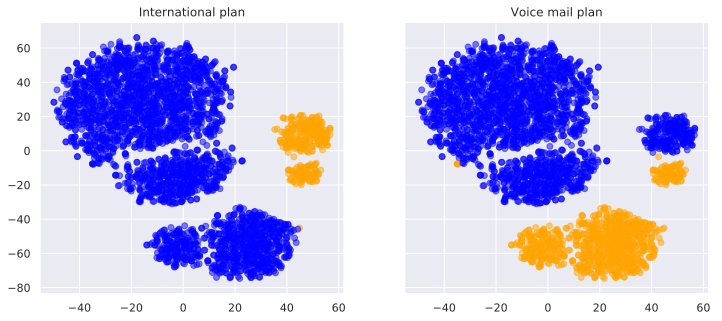

In [45]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
                    c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5);
    axes[i].set_title(name);

## 5. Specific techniques: Survival plots

In [46]:
# Ejecutar si da fallo en Colab
!pip install lifelines

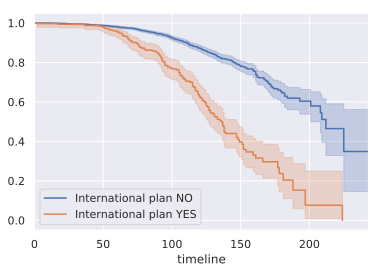

In [47]:
from lifelines import KaplanMeierFitter

kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

## fit the model for 1st cohort
kmf1.fit(df['Account length'][df['International plan'] == 'No'], 
         df['Churn'][df['International plan'] == 'No'], 
         label='International plan NO')

a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(df['Account length'][df['International plan'] == 'Yes'], 
         df['Churn'][df['International plan'] == 'Yes'], 
         label='International plan YES')

g = kmf1.plot(ax=a1)

## 6. Useful resources
- The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
- ["Plotly for interactive plots"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/plotly_tutorial_for_interactive_plots_sankovalev.ipynb) - a tutorial by Alexander Kovalev within mlcourse.ai (full list of tutorials is [here](https://mlcourse.ai/tutorials))
- ["Bring your plots to life with Matplotlib animations"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/bring_your_plots_to_life_with_matplotlib_animations_kyriacos_kyriacou.ipynb) - a tutorial by Kyriacos Kyriacou within mlcourse.ai
- ["Some details on Matplotlib"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/some_details_in_matplotlib_pisarev_ivan.ipynb) - a tutorial by Ivan Pisarev within mlcourse.ai
- Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd) based on this notebook
- Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
- If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/323210/) on Habrahabr with ~ the same material. And a [lecture](https://youtu.be/vm63p8Od0bM) on YouTube
- Here is the official documentation for the libraries we used: [`matplotlib`](https://matplotlib.org/contents.html), [`seaborn`](https://seaborn.pydata.org/introduction.html) and [`pandas`](https://pandas.pydata.org/pandas-docs/stable/).
- The [gallery](http://seaborn.pydata.org/examples/index.html) of sample charts created with `seaborn` is a very good resource.
- Also, see the [documentation](http://scikit-learn.org/stable/modules/manifold.html) on Manifold Learning in `scikit-learn`.
- Efficient t-SNE implementation [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE).
- "How to Use t-SNE Effectively", [Distill.pub](https://distill.pub/2016/misread-tsne/).